In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [27]:
df = pd.read_csv("demo.csv")

In [28]:
df = df.replace('na', np.nan)

In [29]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 math score               0
reading score            0
writing score            0
placement score          0
placement offer count    0
club join year           0
dtype: int64


In [30]:
numeric_cols = ['math score', 'reading score', 'writing score', 'placement score']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [32]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
print("Data Types:\n", df.dtypes)

Data Types:
 math score               int64
reading score            int64
writing score            int64
placement score          int64
placement offer count    int64
club join year           int64
dtype: object


Outliers in math score:
     math score  reading score  writing score  placement score  \
3           61             77             74               76   
10         160             67             12               83   
21         100             77             70               91   
25         180             67             63               75   
28         120             73             71               94   

    placement offer count  club join year  
3                       2            2020  
10                      2            2020  
21                      3            2018  
25                      3            2021  
28                      3            2019  


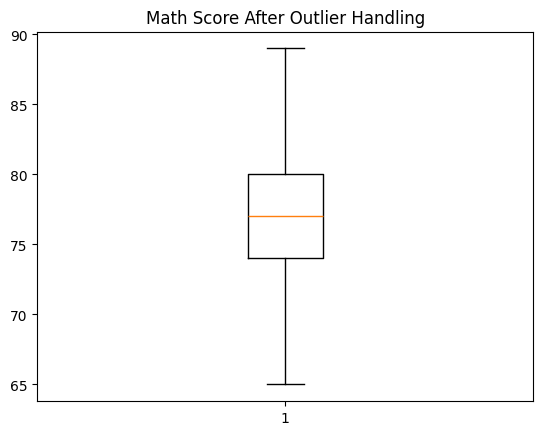

In [33]:
# 2. Detect and Handle Outliers
# IQR method for 'math score'
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['math score'] < lower_bound) | (df['math score'] > upper_bound)]
print("Outliers in math score:\n", outliers)
# Cap outliers
df['math score'] = df['math score'].clip(lower=lower_bound, upper=upper_bound)
# Visualize
plt.boxplot(df['math score'].dropna())
plt.title("Math Score After Outlier Handling")
plt.show()

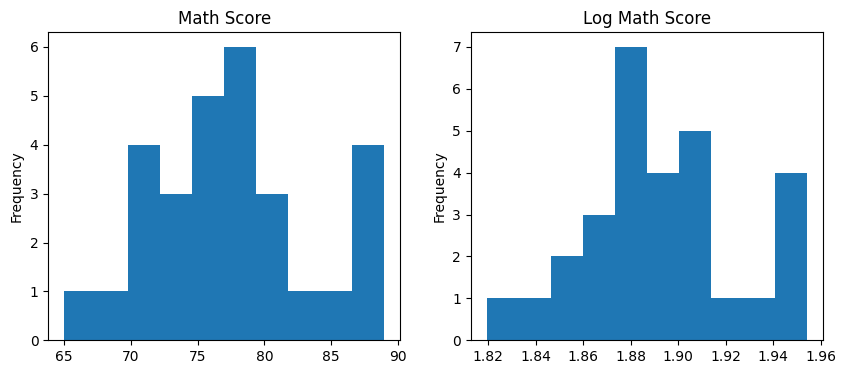

Skewness Before: 0.452378188248756
Skewness After: 0.25707871920453373


In [34]:
# 3. Data Transformation
# Log transformation to reduce skewness
df['log_math'] = np.log10(df['math score'] + 1)  # Add 1 to handle zeros
# Visualize before and after
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['math score'].plot(kind='hist', ax=axes[0], title='Math Score')
df['log_math'].plot(kind='hist', ax=axes[1], title='Log Math Score')
plt.show()
# Skewness
print("Skewness Before:", df['math score'].skew())
print("Skewness After:", df['log_math'].skew())